In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV 
from sklearn.linear_model import Perceptron, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier, PassiveAggressiveClassifier, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error, confusion_matrix, silhouette_score
from sklearn.metrics import roc_auc_score,roc_curve, auc, classification_report,precision_score,recall_score,log_loss,f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer,minmax_scale,PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn import tree
import pandas_bokeh
from sklearn.decomposition import PCA,KernelPCA
from sklearn.calibration import CalibratedClassifierCV
from numpy import mean, std
import pandas.testing as tm
from scipy import stats
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer




from yellowbrick.features import PCA as PCA_YB
from yellowbrick.features.radviz import RadViz
from yellowbrick.features import pca_decomposition
from yellowbrick.features import Manifold
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import ParallelCoordinates
from yellowbrick.model_selection import RFECV
from yellowbrick.classifier import ROCAUC


#other
from math import sqrt
import inspect
from matplotlib.font_manager import FontProperties
from scipy.stats import loguniform, uniform
from bokeh import io

import eli5
%matplotlib inline

In [2]:
DATASET_URL = "https://gist.githubusercontent.com/YHYeoh/ad1a7f7170c72d621d05a70637540152/raw/5a6059c199e2c46d2f3d258f03d93cfea98e2749/marketing_campaign.csv"
data = pd.read_csv(DATASET_URL, sep = ';')

pd.set_option('plotting.backend','pandas_bokeh')

data.fillna(method = "ffill", inplace = True)
data.isnull().values.any()


education_order = [['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']]
ordinal_encoder = OrdinalEncoder(categories=education_order)
enc = OneHotEncoder()


data["Education"] = (ordinal_encoder.fit_transform(data["Education"].values.reshape(-1, 1))).astype(int)
print(ordinal_encoder.categories_)

data_copy = data
marital_status_ohe = pd.get_dummies(data["Marital_Status"],prefix="Marital")
ohe_cols = marital_status_ohe.columns
data = pd.concat([data, marital_status_ohe], axis=1)

data.drop(["ID", 'Dt_Customer',"Z_CostContact","Z_Revenue","Marital_Status"], axis=1, inplace=True)

categorical = ['Marital_Status']
numerical = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain']
numerical_no_bool = ['Education','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

y = data.Response
print(y.value_counts())
X = data.drop(['Response'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)
X_train_cont = X_train.drop(['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Education','Complain','Year_Birth','Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO'],axis=1)
X_test_cont = X_test.drop(['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Education','Complain','Year_Birth','Marital_Absurd', 'Marital_Alone', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Marital_YOLO'],axis=1)
X_cont_column = X_train_cont.columns
pcaX_train = X_train_cont
pcaX_test = X_test_cont

[array(['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD'], dtype=object)]
0    1906
1     334
Name: Response, dtype: int64


In [40]:
def hasmethod(obj, name):
	return inspect.ismethod(getattr(obj, name, None))

def ROC_Curve_Plot(model,X_test,y_test,name):
	predProb = model.predict_proba(X_test)
	preds = predProb[:,1]
	fpr, tpr, threshold = roc_curve(y_test, preds,pos_label=1)
	roc_auc = auc(fpr, tpr)
	plt.close()
	plt.title(name+' Receiver Operating Characteristic')
	plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
	plt.legend(loc = 'lower right')
	plt.plot([0, 1], [0, 1],'r--')
	plt.ylabel('True Positive Rate')
	plt.xlabel('False Positive Rate')
	plt.show()
	return fpr,tpr

def setupPreprocessPipeline(scaler):
	ss = Pipeline(steps=[('scaler',scaler)])
	#ohe = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown = 'ignore'))])
	preprocess = ColumnTransformer(
                    transformers=[
                        ('cont', ss, numerical_no_bool)
                        #('cat', ohe, categorical),
                        #('le', le, ordinal),
                        ],remainder='passthrough')
	return preprocess

def feature_importance(classifier, feature_names, scaler_name):
	if (hasattr(classifier,'coef_')):
		importance = classifier.coef_[0]
	elif (hasattr(classifier,'coefs_')):
		importance = classifier.coefs_
	elif (hasattr(classifier,'feature_importances_')):
		importance = classifier.feature_importances_
	else:
		print("Cannot extract feature importance, skipping")
		return

	#for i,v in enumerate(importance):
	#	print('Feature: %d, Score: %.5f' % (i,v))
	zipped = zip(feature_names, importance)
	df = pd.DataFrame(zipped, columns=["feature", "value"])
	# Sort the features by the absolute value of their coefficient
	df["abs_value"] = df["value"].apply(lambda x: abs(x))
	df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
	df = df.sort_values("abs_value", ascending=False)
	# plot feature importance
	fig, ax = plt.subplots(1, 1, figsize=(16, 9))
	sns.barplot(x="feature",
	            y="value",
	            data=df.head(20),
	           palette=df.head(20)["colors"])
	plt.gcf().subplots_adjust(bottom=0.30)
	ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)
	ax.set_title("Top 20 Features for {} w/ {}".format(classifier.__class__.__name__, scaler_name), fontsize=25)
	ax.set_ylabel("Coef", fontsize=22)
	ax.set_xlabel("Feature Name", fontsize=22)
	plt.show()

def evaluation(y, y_hat, title):
	cm = confusion_matrix(y, y_hat)
	precision = precision_score(y, y_hat)
	recall = recall_score(y, y_hat)
	accuracy = accuracy_score(y,y_hat)
	f1 = f1_score(y,y_hat)
	print('Recall: ', recall)
	print('Accuracy: ', accuracy)
	print('Precision: ', precision)
	print('F1: ', f1)
	sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
	plt.xlabel('predicted', fontsize=18)
	plt.ylabel('actual', fontsize=18)
	plt.title(title, fontsize=18)
	plt.show()
    
def metrics_summary(y_test,y_pred):
	tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
	accuracy=accuracy_score(y_test, y_pred)
	precision = precision_score(y_test, y_pred)
	recall =  recall_score(y_test, y_pred) #sensitivity
	specificity = tn / (tn+fp)
	g_mean= sqrt(recall * specificity)
	mse =mean_squared_error(y_test, y_pred, squared=False)
	r2=r2_score(y_test, y_pred)
	ros = roc_auc_score(y_test, y_pred)
	ll = log_loss(y_test, y_pred)
	f1 = f1_score(y_test, y_pred)
	
	metrics_collection_dict ={
        'accuracy':['accuracy',accuracy],
        'precision':['precision',precision],
        'recall':['recall',recall],
        'specificity':['specificity',specificity],
        'g_mean':['g_mean',g_mean],
        'mean_square_error':['mean_square_error',mse],
        'r2':['r2',r2],
        'roc_auc_score':['roc_auc_score',ros],
        'log_loss':['log_loss',ll],
        'f1_score':['f1_score',f1]
    } 
	return metrics_collection_dict

def f1_auc_metrics(model,X_train,y_train,y_pred):
	model.fit(X_train,)
	ros = roc_auc_score(y_test, y_pred)
	f1 = f1_score(y_test, y_pred)
	
	metrics_collection_dict ={
        'roc_auc_score':['roc_auc_score',ros],
        'f1_score':['f1_score',f1]
    } 
	return metrics_collection_dict


def correlationPlot():
	visualizer = Rank2D(
        features=X_train.columns, algorithm='covariance'
    )
	visualizer.fit(X_train, y_train)                # Fit the data to the visualizer
	visualizer.transform(X_train)             # Transform the data
	visualizer.show()                   # Finalize and render the figure

def radVisualize():
	visualizer = RadViz() #nice
	visualizer.fit(X, y)
	visualizer.transform(X)
	visualizer.show()
def pca_scatter_plot():
	visualizer = pca_decomposition(X, y, scale=True, classes=['no','yes'])
	visualizer.show()
def precision_recall_curve(model):
	viz = PrecisionRecallCurve(model)
	viz.fit(X_train, y_train)
	viz.score(X_test, y_test)          #ok
	viz.show()
    
def overallClassificationReport(model,classes):
	visualizer = ClassificationReport(model, classes=classes, support=True) #might can change
	visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
	if(model.__class__.__name__ == "XGBClassifier"): #special treatment for xgboost as it reordered column
		model.fit(X_train, y_train)
		reorderedColumn = model.get_booster().feature_names
		reordered_Xtest = X_test[reorderedColumn] #reorderColumn
		visualizer.score(X_test, y_test)        
		visualizer.show()
		return
	visualizer.score(X_test, y_test)        # Evaluate the model on the test data
	visualizer.show()

def class_predict_err_plot(model,classes):
	visualizer = ClassPredictionError(model, classes=classes,encoder={1: 'yes',0: 'no'})
	# Fit the training data to the visualizer
	visualizer.fit(X_train, y_train)
	# Evaluate the model on the test data
	visualizer.score(X_test, y_test)
	# Draw visualization
	visualizer.show()

def learning_curve_plot(model):
	cv = StratifiedKFold(n_splits=12)
	sizes = np.linspace(0.3, 1.0, 10)

	# Instantiate the classification model and visualizer
	visualizer = LearningCurve(
	    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
	)
	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()
    
def cv_scores_plot(model):
	cv = StratifiedKFold(n_splits=12, random_state=42, shuffle= True)
	visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()
def overall_feature_importance(model,X_train,y_train):
	labels = list(map(lambda s: s.title(), X.columns))
	viz = FeatureImportances(model, labels=labels,encoder={1: 'yes',0: 'no'}, relative=False, topn = 8)
	viz.fit(X, y)
	viz.show()
def RFECV_plot(model):
	cv= StratifiedKFold(5)
	# Instantiate RFECV visualizer with a linear SVM classifier
	visualizer = RFECV(model, cv= cv)
	visualizer.fit(X, y)        # Fit the data to the visualizer
	visualizer.show()      #ok
    
def has_feature_imp(classifier):
	status = False
	if (hasattr(classifier,'coef_')):
		status = True
	elif (hasattr(classifier,'coefs_')):
		status = True
	elif (hasattr(classifier,'feature_importances_')):
		status = True
	print("Cannot extract feature importance, skipping")
	return status

def make_plot(item_idx):
	title, X = distributions[item_idx]
	ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
	axarr = (ax_zoom_out, ax_zoom_in)
	plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

	# zoom-in
	zoom_in_percentile_range = (0, 99)
	cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
	cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

	non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
	plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

	norm = mpl.colors.Normalize(y_full.min(), y_full.max())
	mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')
    
def scorer(pcamodel, X, y=None):
    try:
        X_val = X.values
    except:
        X_val = X
    
    try:
        y_val = y.values
    except:
        y_val = y
    data_inv = pcamodel.fit(X_val,y_val).transform(X_val)
    reconstructed = pcamodel.inverse_transform(data_inv)
    #find reconstrucition error
    mse = mean_squared_error(reconstructed.ravel(), X_val.ravel())
    return abs(mse)

def pcaComparison(scaler,X_train,y_train,X_test,y_test):
    cv=10
    scaler = scaler
    X_train_scaled = scaler.fit_transform(pcaX_train,y_train)
    X_test_scaled = scaler.transform(pcaX_test)
    pcaPerformance = pd.DataFrame()
    for transformer in pcaParamGrid :
        pca = transformer['transformer']
        param_grid =  transformer['param_grid']
        PCASearch = RandomizedSearchCV(pca,param_grid,n_iter=10,verbose=2,
                         scoring= scorer,
                         n_jobs=-1,cv=cv,random_state=42)
        PCASearch = PCASearch.fit(X_train_scaled,y_train)

        param = PCASearch.best_params_
        name = PCASearch.best_estimator_.__class__.__name__
        score = PCASearch.best_score_
        pcaResult = {"Model":name,"MSE": score,"Parameter":param,"scaler":scaler}
        pcaPerformance = pcaPerformance.append(pcaResult,ignore_index=True)
    pcaPerformance.sort_values(by='MSE',ascending=True,inplace=True)
    return pcaPerformance

In [4]:
pcaParamGrid = [{
    'transformer':PCA(),'param_grid':{'n_components':list(range(2,8)),'random_state':[42]
                                      ,'whiten':[True,False]
                                      ,'svd_solver':['full', 'arpack', 'randomized']}
},{
    'transformer':KernelPCA(),
    'param_grid':{'gamma':loguniform(1e-6, 100),'n_components':list(range(2,8))
                  ,'random_state':[42],'kernel':['rbf'],
                  'alpha':loguniform(1e-6, 100),'eigen_solver':['dense', 'arpack']
                  ,'n_jobs':[-1],'max_iter':list(range(1,1000)),'fit_inverse_transform':[True,False]}
},
    {
        'transformer':KernelPCA(),
    'param_grid':{'gamma':loguniform(1e-6, 100),'n_components':list(range(2,8))
                  ,'random_state':[42],'kernel':['poly'],
                  'alpha':loguniform(1e-6, 100),'degree':list(range(3,8))
                  ,'n_jobs':[-1],'max_iter':list(range(1,1000)),'eigen_solver':['dense', 'arpack'],
                 'fit_inverse_transform':[True,False]}
    }
]


In [5]:
# differentScalerResult = pd.DataFrame()
# scalers = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(), RobustScaler(),QuantileTransformer()]

# for scaler in scalers:
#     pcaResult = pcaComparison(scaler,pcaX_train,y_train,pcaX_test,y_test)
#     differentScalerResult = differentScalerResult.append(pcaResult,ignore_index=True)
# differentScalerResult.sort_values(by='MSE',ascending=True,inplace=True)


In [6]:
# differentScalerResult

In [7]:
#use the same scaler same as pca
scaler = MaxAbsScaler()
print(scaler)
scaledXTrain = pd.DataFrame(scaler.fit_transform(pcaX_train),columns=X_cont_column)
scaledXTest = pd.DataFrame(scaler.transform(pcaX_test),columns=X_cont_column)

km_list = list()
for clust in range(2,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(scaledXTrain)
    y_pred = km.predict(scaledXTrain)
    sh = silhouette_score(scaledXTrain,y_pred)
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km,
                             'sil':sh}))
io.reset_output()
io.output_notebook()


plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia','sil']]
             .set_index('clusters'))
plot_dataInertia=plot_data['inertia'].astype(float)
ax = plot_dataInertia.plot(marker='o')

#concat so show sihhoutte score
plot_dataSil=plot_data['sil'].astype(float)
ax = plot_dataSil.plot(marker='o')


MaxAbsScaler()


Loading BokehJS ...

In [8]:
#saw 6 cluster has a good silhouette score, create kmean column with 6 cluster
km = KMeans(n_clusters=6, random_state=42)
km = km.fit(scaledXTrain)
kmeanTrainColumn = pd.Series(km.predict(scaledXTrain), name="KMeansTrain")
kmeanTestColumn = pd.Series(km.predict(scaledXTest), name="KMeansTest")

In [9]:
kmeanTrainColumn

0       2
1       3
2       1
3       4
4       0
       ..
1563    5
1564    3
1565    3
1566    5
1567    4
Name: KMeansTrain, Length: 1568, dtype: int32

In [10]:
# i=1
# for rowNo,result in differentScalerResult.iterrows():
#     mse,model,param,scaler = result
#     print(str(i)+" "+str(model))
#     print(mse)
#     print(param)
#     print(scaler)
#     print("\n")
#     if(i==5):
#         break
#     i+=1


In [11]:
#KernelPCA has the lowest error
kpca = KernelPCA(alpha=7.577453045410569, degree= 7, eigen_solver= "dense"
                 , fit_inverse_transform= True, gamma= 1.2767906371238508e-06
                 , kernel= "poly", max_iter= 601, n_components= 5, n_jobs= -1, random_state= 42)
scaler= MaxAbsScaler()
X_train_scaled = scaler.fit_transform(pcaX_train,y_train)
X_test_scaled = scaler.transform(pcaX_test)

kpca = kpca.fit(X_train_scaled,y_train)
transformedXTrain = kpca.transform(X_train_scaled)
transformedXTest=kpca.transform(X_test_scaled)


In [12]:
explained_variance = np.var(transformedXTrain, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print("Explained Variance : \n" +str(explained_variance))
print("Explained Variance Ratio: \n"+str(explained_variance_ratio))

Explained Variance : 
[1.79704429e-06 7.61323360e-07 7.48161573e-07 3.53106625e-07
 3.04646066e-07]
Explained Variance Ratio: 
[0.4533089  0.19204572 0.18872562 0.08907203 0.07684773]


In [13]:
kpcaCol = ["PCA1","PCA2","PCA3","PCA4","PCA5"]
kpcaTrain = pd.DataFrame(transformedXTrain,columns = kpcaCol)
kpcaTest = pd.DataFrame(transformedXTest, columns = kpcaCol)
#reset all train test columns to ensure consistency before merging
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()
y_test = y_test.reset_index()
#drop all continuous columns

X_train_Kmeans = X_train.copy()
X_test_Kmeans = X_test.copy()
X_train_PCA_Kmeans = X_train.drop(columns=X_cont_column,axis=1)
X_test_PCA_Kmeans = X_test.drop(columns=X_cont_column,axis=1)


In [14]:
#remove default unimportant column
unimportant = ["index","Year_Birth"]
X_train_Kmeans = X_train_Kmeans.drop(columns=unimportant,axis=1)
X_test_Kmeans = X_test_Kmeans.drop(columns=unimportant,axis=1)
X_train_PCA_Kmeans = X_train_PCA_Kmeans.drop(columns=unimportant,axis=1)
X_test_PCA_Kmeans = X_test_PCA_Kmeans.drop(columns=unimportant,axis=1)
X_train = X_train.drop(columns=unimportant,axis=1)
X_test = X_test.drop(columns=unimportant,axis=1)
y_train = y_train.drop(columns=['index'],axis=1)
y_test = y_test.drop(columns=['index'],axis=1)

In [15]:
#add kmean column into all known data except x_train
X_train_Kmeans["KMean"]=kmeanTrainColumn
X_test_Kmeans["KMean"]=kmeanTestColumn
X_train_PCA_Kmeans["KMean"]=kmeanTrainColumn
X_test_PCA_Kmeans["KMean"]=kmeanTestColumn

In [16]:
X_train_PCA_Kmeans

,Education,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Marital_Absurd,Marital_Alone,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Marital_YOLO,KMean
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5
1564,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
1565,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3
1566,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5


In [17]:
#addPCA column
kpcaCol = ["PCA1","PCA2","PCA3","PCA4","PCA5"]

#PCA and Kmeans
X_train_PCA_Kmeans[kpcaCol]=kpcaTrain
X_test_PCA_Kmeans[kpcaCol]=kpcaTest

#PCA only
X_train_PCA = kpcaTrain
X_test_PCA = kpcaTest

In [18]:
rbf_sampler = RBFSampler(gamma = 5.0,n_components=100)
X_train_rbf = rbf_sampler.fit_transform(X_train_PCA)
X_test_rbf = rbf_sampler.transform(X_test_PCA)

In [19]:
sampler = SMOTE()
# stratified(SMOTE) x
X_trainS, y_trainS = sampler.fit_resample(X_train, y_train.copy())
# stratified(SMOTE) x with k means
X_train_Kmeans, y_trainR = sampler.fit_resample(X_train_Kmeans, y_train.copy())
# stratified(SMOTE) x with pca
X_train_PCA, y_trainR = sampler.fit_resample(X_train_PCA, y_train.copy())
# stratified(SMOTE) x with rbf
X_train_rbf, y_trainR = sampler.fit_resample(X_train_rbf, y_train.copy())
# stratified(SMOTE) x with pca and k means
X_train_PCA_Kmeans, y_trainR = sampler.fit_resample(X_train_PCA_Kmeans, y_train.copy())

In [43]:
def cross_validate(classifier, cv,X_train,y_train):
	scalers = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(), RobustScaler(),QuantileTransformer()]
	train_acc = []
	test_acc = []
	mean = []
	result = []
	for scaler in scalers:
		fpr = None
		tpr = None
		preprocess = setupPreprocessPipeline(scaler)
		pipeline = Pipeline(steps=[
	        ('preprocess', preprocess),
	        ('classifier', classifier)
		])

		train_acc = []
		test_acc = []
		mean = []

		for train_ind, val_ind in cv.split(X_train, y_train):
			X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind]
			pipeline.fit(X_t, y_t)
			y_hat_t = pipeline.predict(X_t)
			train_acc.append(accuracy_score(y_t, y_hat_t))
			X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind] 
			y_hat_val = pipeline.predict(X_val)
			test_acc.append(accuracy_score(y_val, y_hat_val))

		#ohe_cols = list(pipeline.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe'].get_feature_names(input_features=categorical))
		numeric_feature_list = list(numerical)
		for i in ohe_cols:
			numeric_feature_list.append(i)
		#print(len(numeric_feature_list))
		#evaluation(y_val, y_hat_val, 'Confusion Matrix {} + {}'.format(classifier.__class__.__name__, scaler.__class__.__name__).strip())
		print('Mean Training Accuracy: {} | Standard Deviation: {}'.format(np.mean(train_acc),np.std(test_acc)))
		print('Mean Validation Accuracy: {} | Standard Deviation: {}'.format(np.mean(test_acc),np.std(test_acc)))
		print('\n')
		feature_importance(classifier, numeric_feature_list, scaler.__class__.__name__ )
		print(y_val.shape,y_hat_val.shape)
		metrics_summ = f1_auc_metrics(y_val.values,y_hat_val)
		if hasmethod(pipeline['classifier'], 'predict_proba'):
			fpr,tpr = ROC_Curve_Plot(pipeline,X_val,y_val,classifier.__class__.__name__ +" w "+scaler.__class__.__name__)
		result.append({
            'classifier':classifier.__class__.__name__,
            'scalerName':scaler.__class__.__name__,
            'metrics_summ':metrics_summ,
            'fpr':fpr,
            'tpr':tpr
        })
	return result

SGDClassifier


C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Mean Training Accuracy: 0.8569417262531065 | Standard Deviation: 0.044590625164235745
Mean Validation Accuracy: 0.8190454950936663 | Standard Deviation: 0.044590625164235745




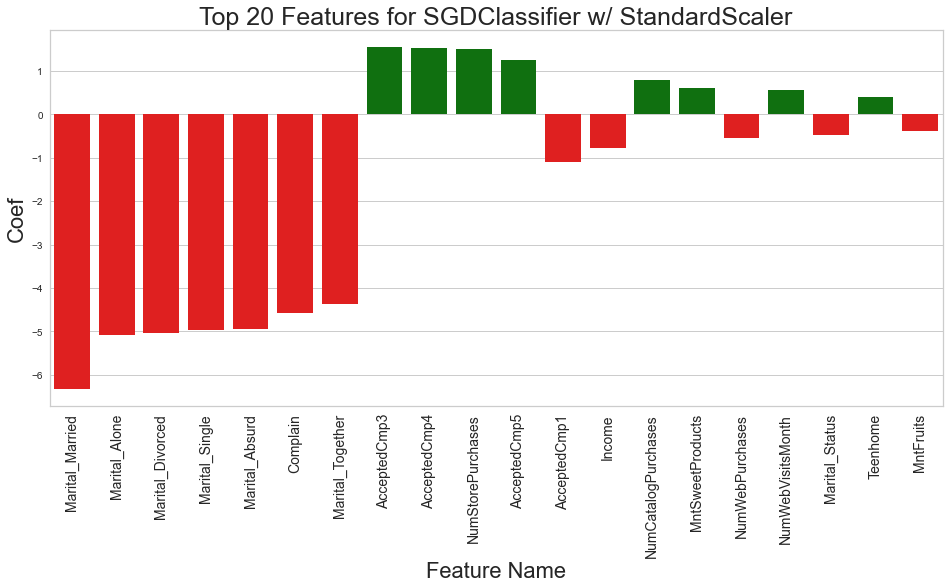

(531, 1) (531,)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [44]:
models = [
	#Lasso(),
	SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet"),
	LinearSVC(), 
	GaussianProcessClassifier(),
	ExtraTreesClassifier(), 
	BernoulliNB(),
	LogisticRegressionCV(max_iter= 1200), 
	RidgeClassifierCV(),
	SVC(kernel = 'linear',max_iter= -1), 
	Perceptron(),
	PassiveAggressiveClassifier(), 
	DecisionTreeClassifier(), #no coef 
	KNeighborsClassifier(),#no feat_import, use permutation_importance 
	GaussianNB(), #no feat_import, use permutation_importance 
	LGBMClassifier(),#no coef 
	RandomForestClassifier(), #no coef 
	GradientBoostingClassifier(),#no coef 
	PassiveAggressiveClassifier(), 
	ExtraTreesClassifier(), #no coef 
	XGBClassifier(),
	AdaBoostClassifier(), #no coef
# 	MLPClassifier() #mlp not working
	]


model_resultX = []
classes = ["no", "yes"]
for model in models:
	print(model.__class__.__name__)
	model_resultX.append(cross_validate(model,KFold(),X_trainS, y_trainS))
	overallClassificationReport(model,classes)
	if hasmethod(model, 'predict_proba'):
		ROC_Curve_Plot(model,X_test,y_test,"Overall "+model.__class__.__name__)
	if has_feature_imp(model) :
		overall_feature_importance(model)
warnings.filterwarnings("default")

In [25]:
y_trainS['Response'].value_counts()

1    1329
0    1329
Name: Response, dtype: int64

In [23]:
y_trainS

,Response
0,0
1,0
2,1
3,0
4,0
...,...
2653,1
2654,1
2655,1
2656,1
